In [7]:
import matplotlib.pyplot as plt
import re
from collections import Counter
import numpy as np
import math

def parse_log(filename, target_file_name):
    feature_counts = []
    best_errors = []
    error_progressions = []
    selected_features_lists = []
    current_file = None

    with open(filename, 'r') as f:
        for line in f:
            match = re.match(r"Working on b'(.*?)'\.\.\.", line)
            if match:
                current_file = match.group(1)
                continue
        
            if current_file == target_file_name:
                section_red = re.match(r"Reduction to (\d+) features.", line)
                section_err = re.match(r"Best error: ([\d.e+-]+).", line)
                section_hist = re.match(r"Error history: \[(.*?)]\.", line)
                section_select = re.match(r".*?Selected subset: \[(.*?)\]", line)
                if section_red:
                    feature_count = int(section_red[1])
                    feature_counts.append(feature_count)
                if section_err:
                    best_error = float(section_err[1])
                    best_errors.append(best_error)
                if section_hist:
                    error_history = [float(x.strip(" array()")) for x in section_hist[1].split(",")]
                    error_progressions.append(error_history)
                if section_select:
                    selected_features = re.findall(r"'(.*?)'", section_select[1])
                    selected_features_lists.extend(selected_features)
        return feature_counts, best_errors, error_progressions, selected_features_lists

def plot_error_vs_feature_count(feature_counts, best_errors):
    plt.figure(figsize=(10, 6))
    plt.plot(feature_counts, best_errors, marker='o', linestyle='-')
    plt.xlabel('Feature Count')
    plt.ylabel('Best Error')
    plt.title(f'Reduction of Best Error with Feature Count Increase')
    plt.grid(True)
    plt.show()

def plot_error_progressions(feature_counts, error_progressions):
    rows = math.ceil(len(feature_counts) / 2)
    fig, axs = plt.subplots(rows, 2, figsize=(14, rows * 4))
    axs = axs.flatten()

    for idx, (count, progression) in enumerate(zip(feature_counts, error_progressions)):
        axs[idx].plot(progression)
        axs[idx].set_title(f"Error Progression - {count} Features")
        axs[idx].set_xlabel("Iteration")
        axs[idx].set_ylabel("Error")
        axs[idx].grid(True)

    for idx in range(len(feature_counts), len(axs)):
        axs[idx].axis("off")

    fig.suptitle("Error Reduction Progression for Each Feature Count", fontsize=16)
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

def plot_feature_frequency(selected_features_lists):
    feature_counter = Counter(selected_features_lists)
    features, counts = zip(*feature_counter.items())

    plt.figure(figsize=(12, 8))
    plt.bar(features, counts)
    plt.xlabel("Features")
    plt.ylabel("Frequency")
    plt.title("Frequency of Each Feature in Selected Subsets")
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.show()

def analyze_file(log_name, file_name):
    feature_counts, best_errors, error_progressions, selected_features_lists = parse_log(log_name, file_name)

    plot_error_vs_feature_count(feature_counts, best_errors)
    plot_error_progressions(feature_counts, error_progressions)
    plot_feature_frequency(selected_features_lists)

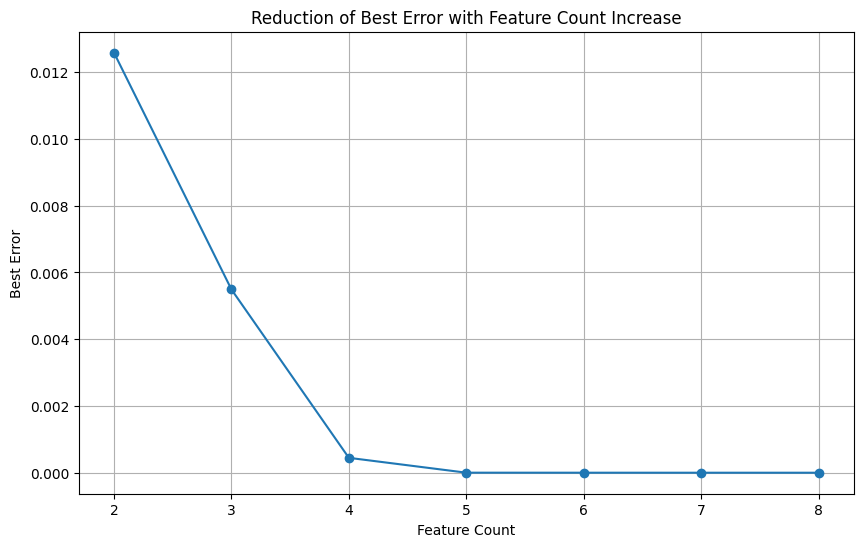

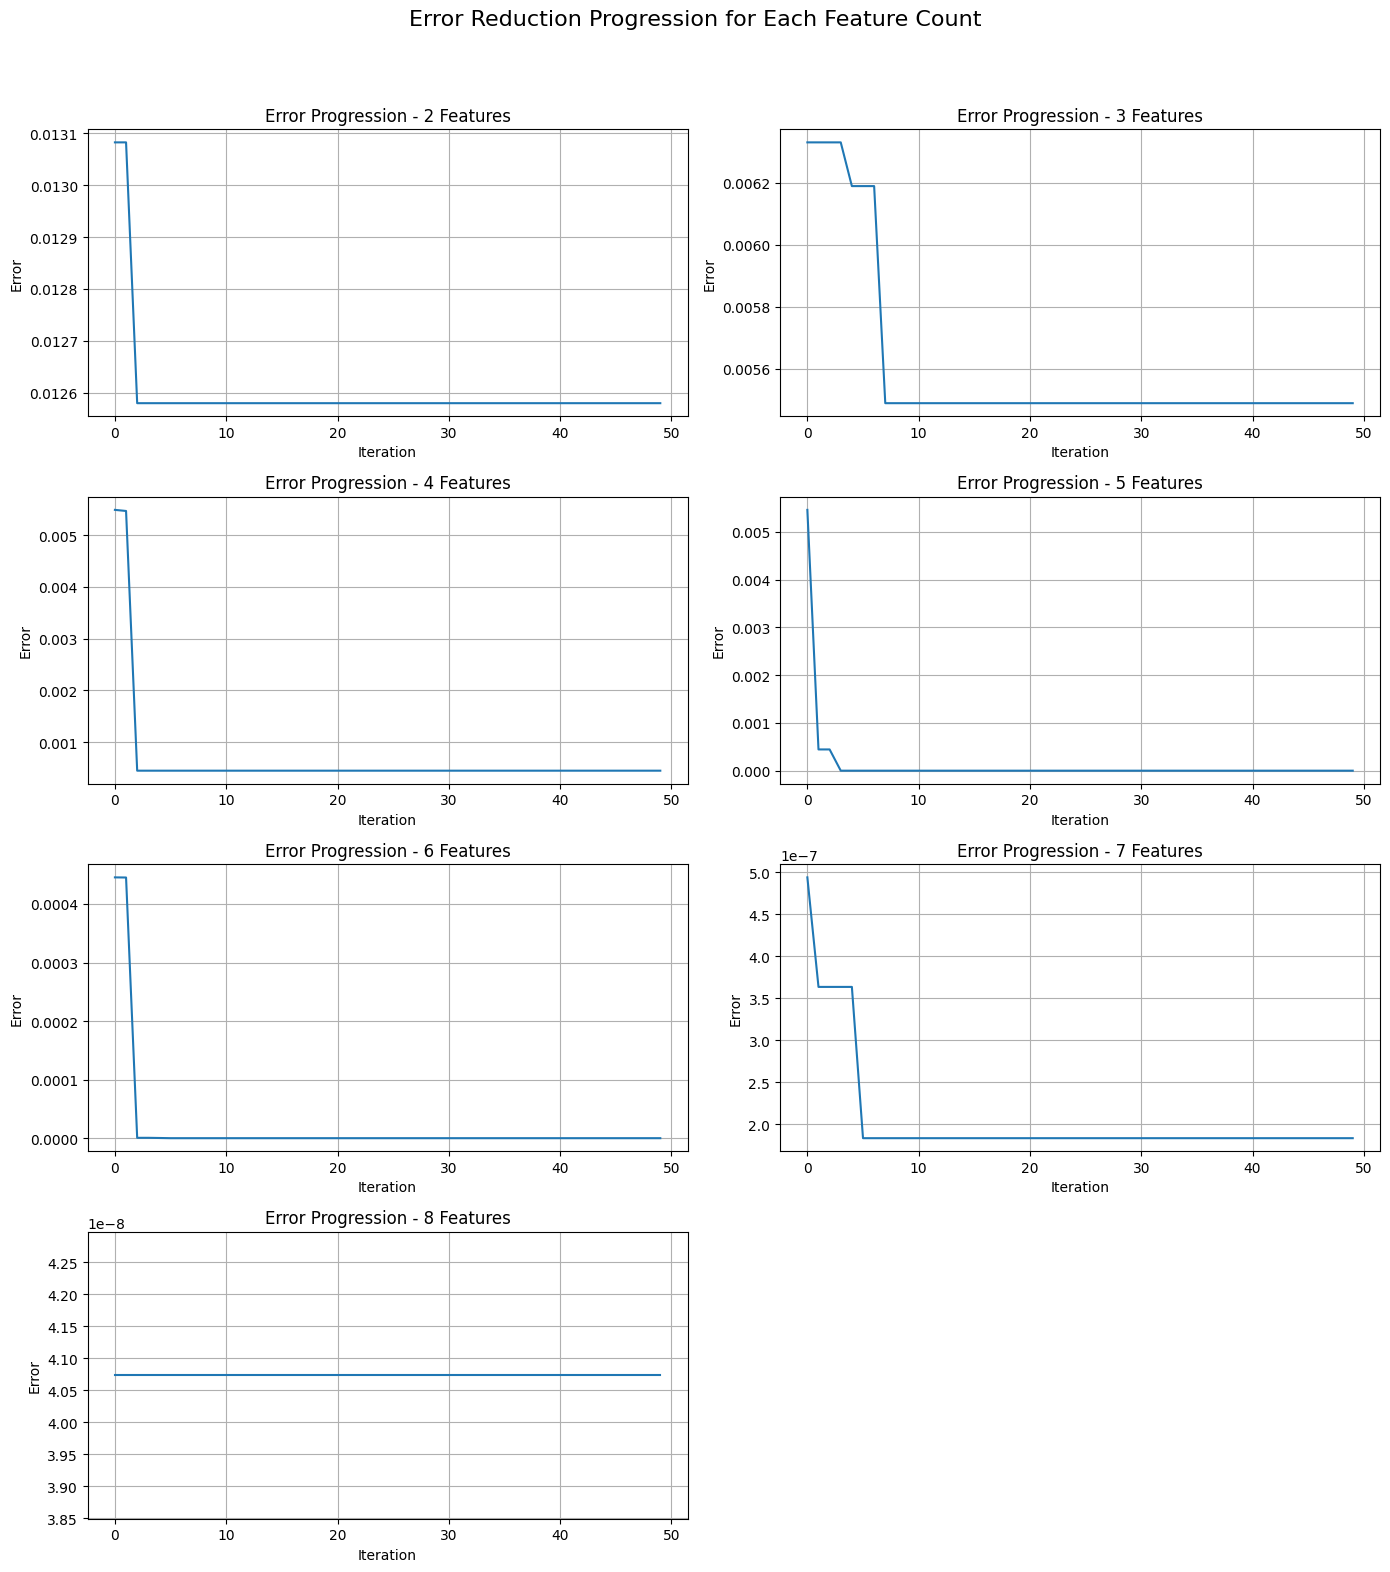

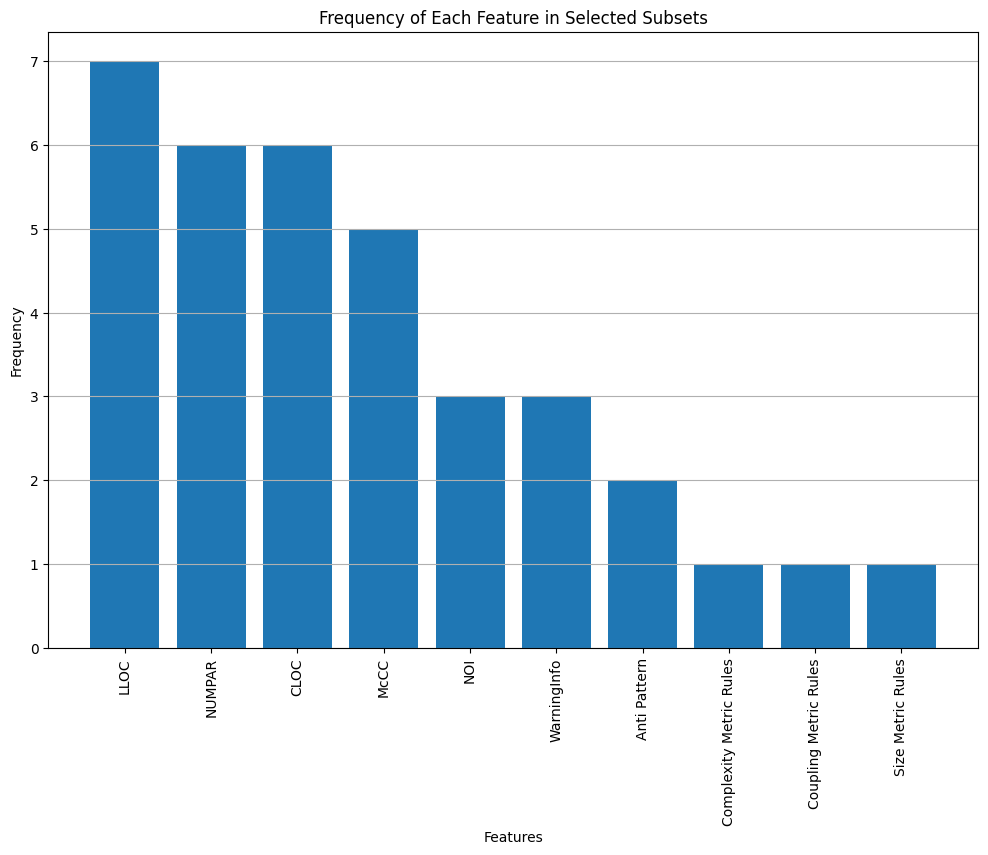

In [ ]:
analyze_file('../../utputs/log/abc_meta_analysis.log', 'lm-sys_FastChat-Method.csv')

[('LLOC', 237), ('CLOC', 232), ('NUMPAR', 209), ('McCC', 191), ('NOI', 148), ('WarningInfo', 116), ('Size Metric Rules', 71), ('Anti Pattern', 49), ('Coupling Metric Rules', 40), ('Complexity Metric Rules', 37)]


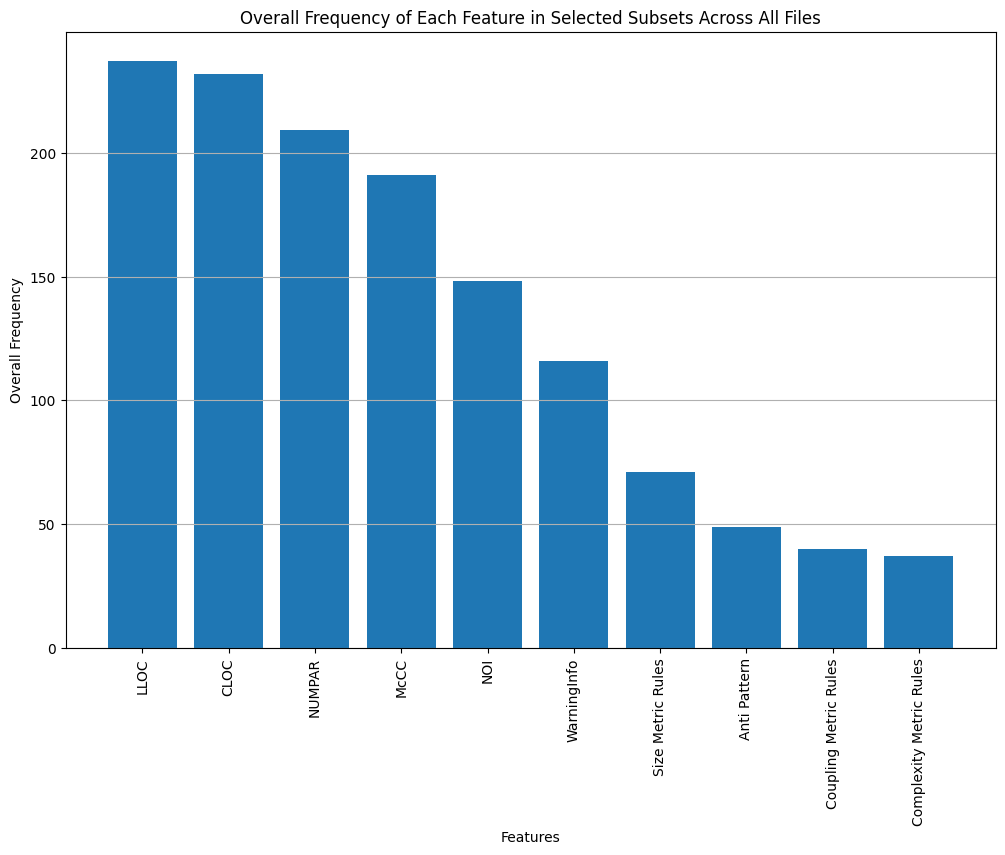

In [ ]:
def plot_overall_feature_frequency_all(log_name):
    overall_selected_features = []

    with open(log_name, 'r') as file:
        for line in file:
            match = re.search(r"Selected subset: \[(.*?)\]", line)
            if match:
                features = re.findall(r"'(.*?)'", match.group(1))
                overall_selected_features.extend(features)

    feature_counter = Counter(overall_selected_features)
    sorted_features = feature_counter.most_common()
    print(sorted_features)
    features, counts = zip(*sorted_features)

    plt.figure(figsize=(12, 8))
    plt.bar(features, counts)
    plt.xlabel("Features")
    plt.ylabel("Overall Frequency")
    plt.title("Overall Frequency of Each Feature in Selected Subsets Across All Files")
    plt.xticks(rotation=90)
    plt.grid(axis='y')
    plt.show()

log_name = r'..\..\outputs\log\abc_meta_90.log'
plot_overall_feature_frequency_all(log_name)

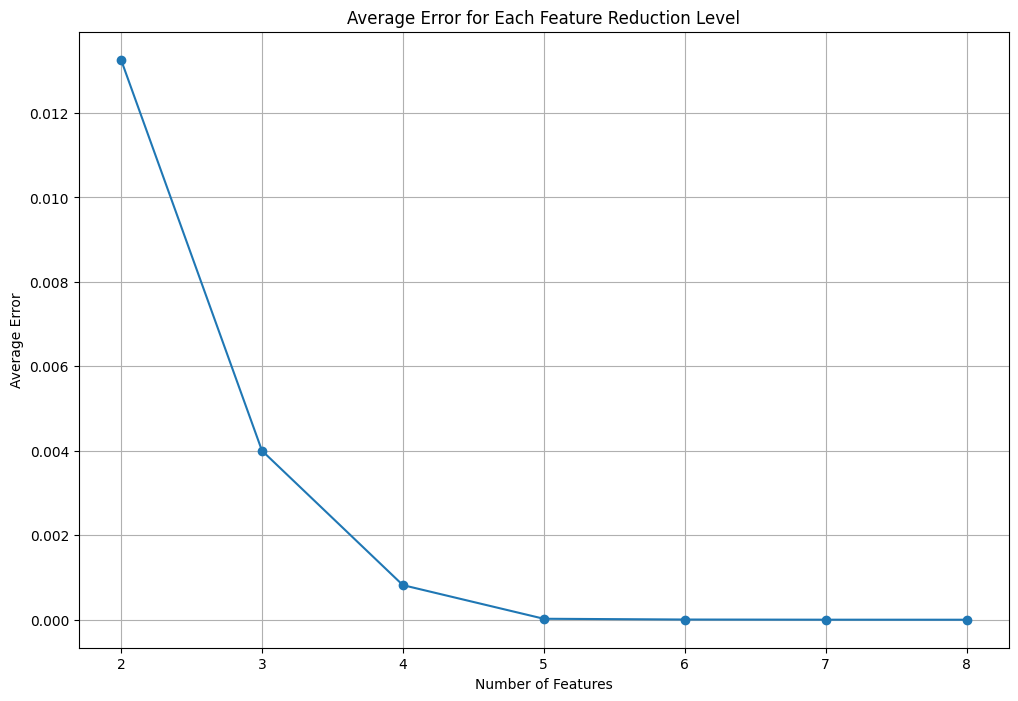

In [3]:
from collections import defaultdict

def parse_log_and_calculate_errors(log_name):
    feature_errors = defaultdict(list)
    with open(log_name, 'r') as f:
        current_feature_count = None
        for line in f:
            reduction_match = re.match(r"Reduction to (\d+) features.", line)
            if reduction_match:
                current_feature_count = int(reduction_match.group(1))
            error_match = re.match(r"Best error: ([\d.e+-]+).", line)
            if error_match and current_feature_count is not None:
                error = float(error_match.group(1))
                feature_errors[current_feature_count].append(error)
                current_feature_count = None
    avg_errors = {count: sum(errors) / len(errors) for count, errors in feature_errors.items()}
    return avg_errors

def plot_average_error(avg_errors):
    feature_counts = sorted(avg_errors.keys())
    avg_error_values = [avg_errors[count] for count in feature_counts]
    plt.figure(figsize=(12, 8))
    plt.plot(feature_counts, avg_error_values, marker='o', linestyle='-')
    plt.xlabel("Number of Features")
    plt.ylabel("Average Error")
    plt.title("Average Error for Each Feature Reduction Level")
    plt.grid(True)
    plt.show()

log_name = r'outputs\log\abc_meta_90.log'
avg_errors = parse_log_and_calculate_errors(log_name)
plot_average_error(avg_errors)

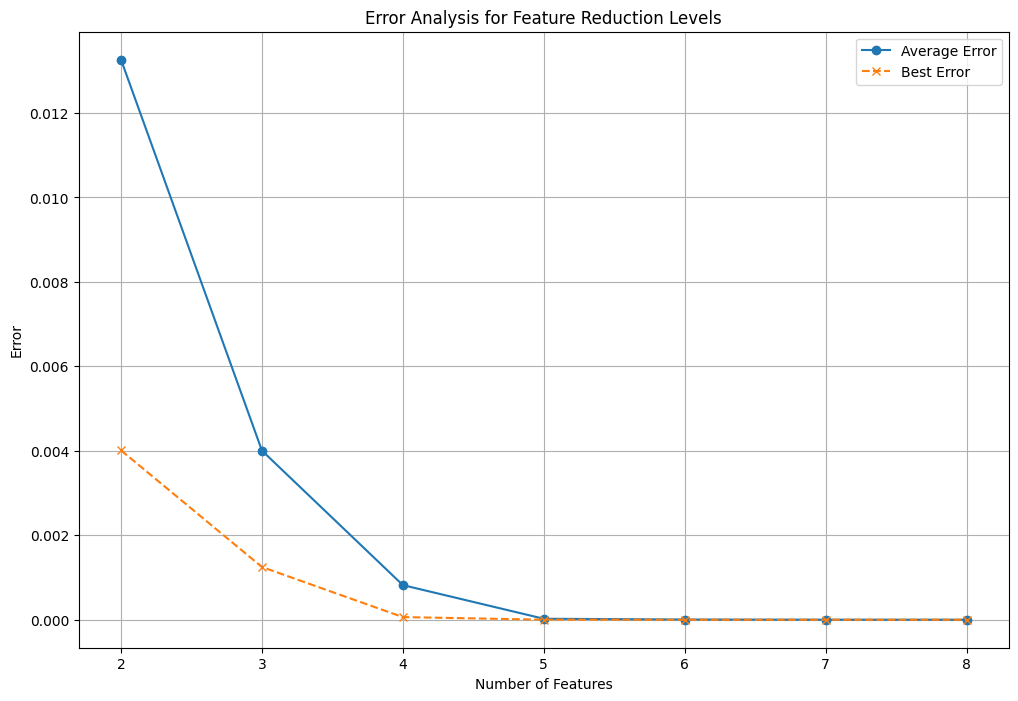

In [4]:
from collections import defaultdict
import matplotlib.pyplot as plt
import re

def parse_log_and_calculate_errors(log_name):
    feature_errors = defaultdict(list)
    best_errors = {}
    with open(log_name, 'r') as f:
        current_feature_count = None
        for line in f:
            reduction_match = re.match(r"Reduction to (\d+) features.", line)
            if reduction_match:
                current_feature_count = int(reduction_match.group(1))
            error_match = re.match(r"Best error: ([\d.e+-]+).", line)
            if error_match and current_feature_count is not None:
                error = float(error_match.group(1))
                feature_errors[current_feature_count].append(error)
                # Track the minimum (best) error for each feature count
                if current_feature_count not in best_errors or error < best_errors[current_feature_count]:
                    best_errors[current_feature_count] = error
                current_feature_count = None
    avg_errors = {count: sum(errors) / len(errors) for count, errors in feature_errors.items()}
    return avg_errors, best_errors

def plot_errors(avg_errors, best_errors):
    feature_counts = sorted(avg_errors.keys())
    avg_error_values = [avg_errors[count] for count in feature_counts]
    best_error_values = [best_errors[count] for count in feature_counts]
    
    plt.figure(figsize=(12, 8))
    plt.plot(feature_counts, avg_error_values, marker='o', linestyle='-', label="Average Error")
    plt.plot(feature_counts, best_error_values, marker='x', linestyle='--', label="Best Error")
    plt.xlabel("Number of Features")
    plt.ylabel("Error")
    plt.title("Error Analysis for Feature Reduction Levels")
    plt.legend()
    plt.grid(True)
    plt.show()

avg_errors, best_errors = parse_log_and_calculate_errors(log_name)
plot_errors(avg_errors, best_errors)